In [553]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import seaborn as sns
import os

In [552]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/train.csv')
train_df.head(10)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
5,0025bde0c.jpg,3,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...
6,0025bde0c.jpg,4,315139 8 315395 15 315651 16 315906 17 316162 ...
7,002af848d.jpg,4,290800 6 291055 13 291311 15 291566 18 291822 ...
8,002fc4e19.jpg,1,146021 3 146275 10 146529 40 146783 46 147038 ...
9,002fc4e19.jpg,2,145658 7 145901 20 146144 33 146386 47 146629 ...


In [109]:
file_path ='/content/drive/My Drive/Colab Notebooks/Steel Defect Detection/train_images/'
directory = os.fsencode(file_path)

class_dict = {0:[],1:[],2:[],3:[],4:[]}

for img in os.listdir(directory):
  img_name = os.fsdecode(img)
  if img_name in train_df['ImageId'].unique():
    if (train_df.loc[train_df['ImageId'] == img_name, 'ClassId'] == 1).any():
      class_dict[1].append(img_name)
    if (train_df.loc[train_df['ImageId'] == img_name, 'ClassId'] == 2).any():
      class_dict[2].append(img_name)
    if (train_df.loc[train_df['ImageId'] == img_name, 'ClassId'] == 3).any():
      class_dict[3].append(img_name)
    if (train_df.loc[train_df['ImageId'] == img_name, 'ClassId'] == 4).any():
      class_dict[4].append(img_name)
  else:
    class_dict[0].append(img_name)

class_lengths = [len(class_dict[i]) for i in class_dict.keys()]

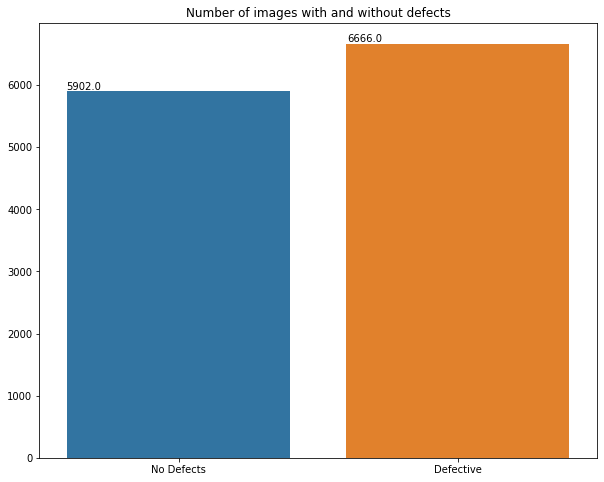

In [117]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y=[class_lengths[0], len(train_df['ImageId'].unique())], x=['No Defects','Defective'])
plt.title('Number of images with and without defects')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

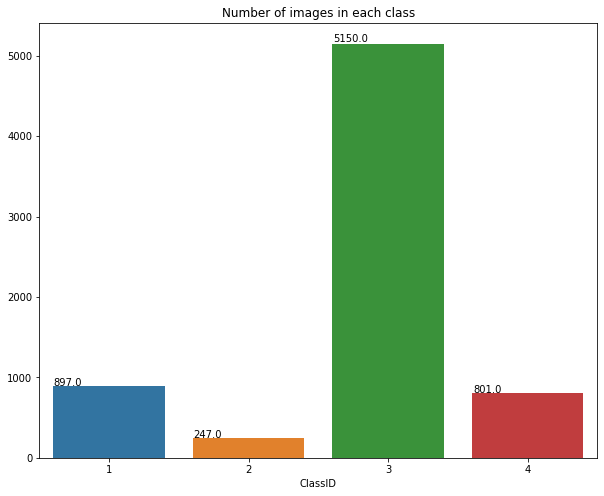

In [118]:
plt.figure(figsize=[10,8])
ax = sns.barplot(y=class_lengths[1:], x=list(class_dict.keys())[1:])
plt.xlabel('ClassID')
plt.title('Number of images in each class')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

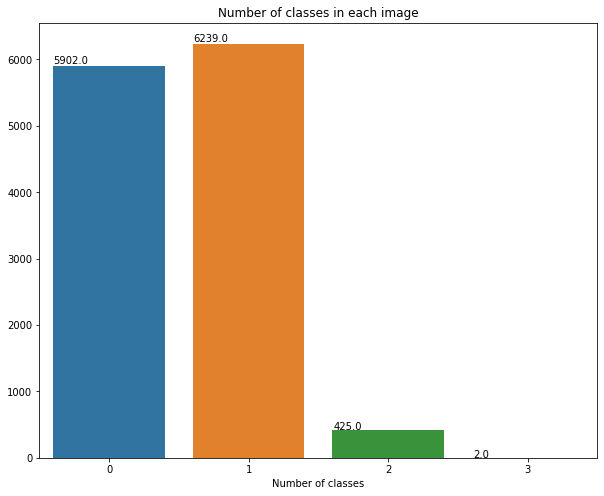

In [157]:
classes_list = list(class_lengths[:1]) + list(train_df.groupby('ImageId').count().groupby("ClassId").count()['EncodedPixels'])

plt.figure(figsize=[10,8])
ax = sns.barplot(y=classes_list, x=[i for i in range(len(classes_list))])
plt.xlabel('Number of classes')
plt.title('Number of classes in each image')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [546]:
def label_image(image_name,class_type):
  img = cv2.imread(path + image_name,0)
  plt.figure(figsize=[10,10])
  plt.imshow(img, cmap='gray')
  img_shape = img.shape[0]*img.shape[1]
  label = np.zeros(img_shape)
  if class_type != 0:
    # mask = train_df.loc[train_df['ImageId'] == image ,'EncodedPixels'].item().split()
    mask = train_df[(train_df['ImageId'] == image_name) & (train_df['ClassId'] == class_type)]['EncodedPixels'].item().split(" ")

    for i in range(0,len(mask),2):
      label[int(mask[i]):int(mask[i])+int(mask[i+1])] = 10

  label = label.reshape(img.shape, order='F')
  plt.imshow(label, cmap='jet', alpha=0.5)

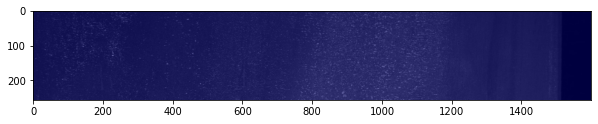

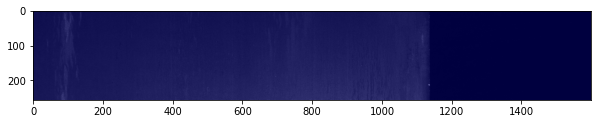

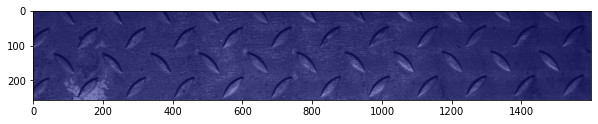

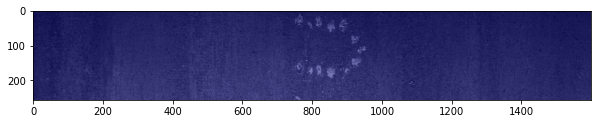

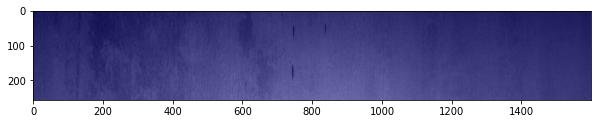

In [547]:
for image in class_dict[0][:5]:
  label_image(image,0)

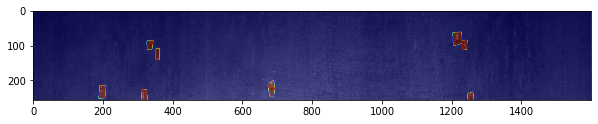

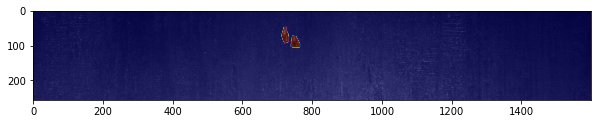

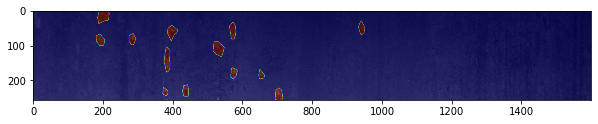

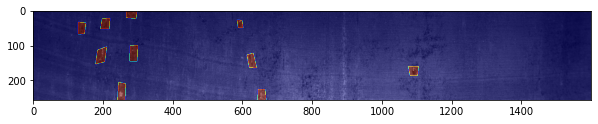

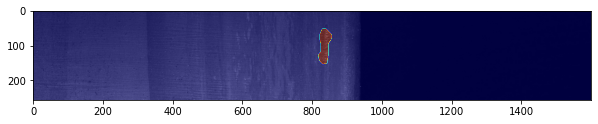

In [548]:
for image in class_dict[1][:5]:
  label_image(image,1)

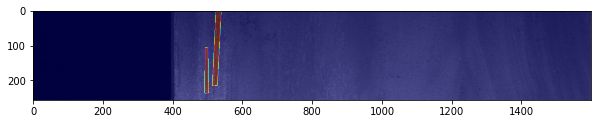

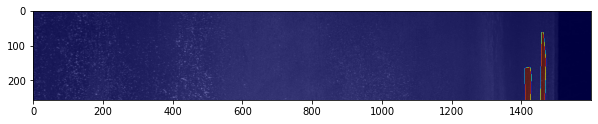

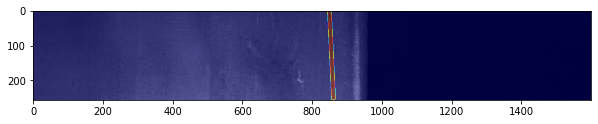

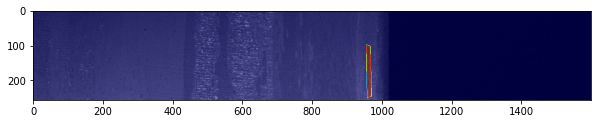

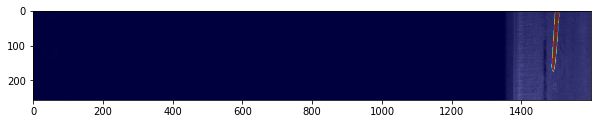

In [549]:
for image in class_dict[2][:5]:
  label_image(image,2)

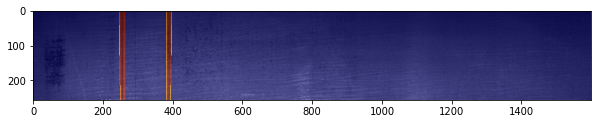

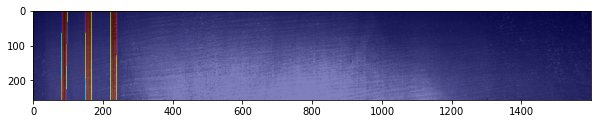

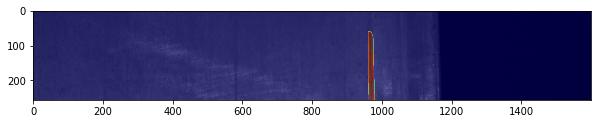

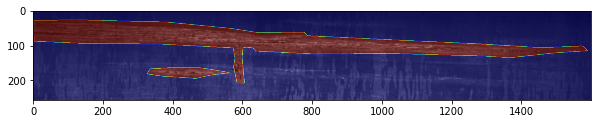

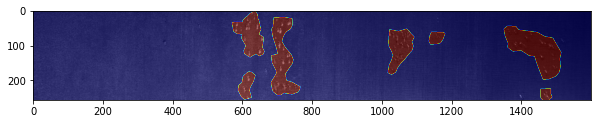

In [550]:
for image in class_dict[3][:5]:
  label_image(image,3)

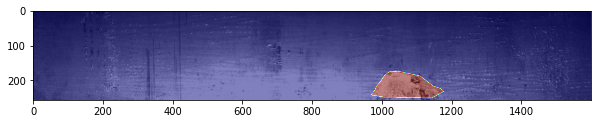

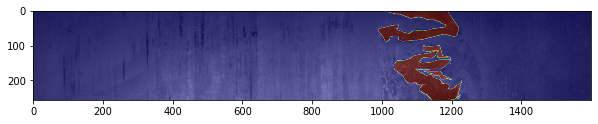

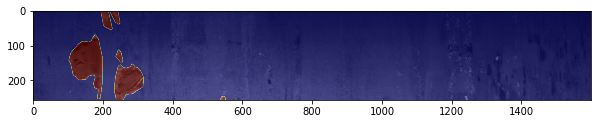

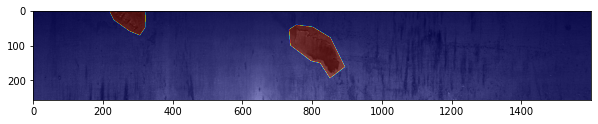

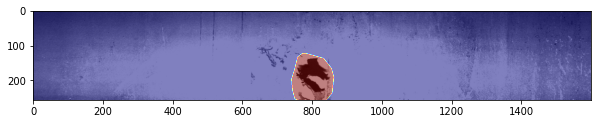

In [551]:
for image in class_dict[4][:5]:
  label_image(image,4)